<a href="https://colab.research.google.com/github/rodrigomv29/hello-world/blob/master/take_at_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM SET 1 - TAKE AT HOME (25 POINTS)

**You will lose all corresponding points if we can't access the implementation notebook URL or the Github URL. We will NOT message you. Do NOT invite the TAs to your Github repo (option 2 below) EARLIER than the morning of the day of the exam, since invites expire in 7 days.**

## Introduction

In the last few years, the field of generative modeling has seen a lot of progress. The techniques that have been developed in this field are very useful for other tasks such as semi-supervised learning, representation learning, and reinforcement learning. In this problem statement we attempt to prepare you to understand the basics of a technique that has been very successful in generative modeling: Variational Autoencoders (VAEs). Understanding VAEs is  the key for you to get a head start with more advanced models such as [Stable Diffusion that are all the rage these days](https://clipdrop.co/stable-diffusion-turbo).



## Task 1: Study what VAEs are and how they work (0 points)

Consult this [blog post](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/) and its [2D VAE autoencoder implemenation for the MNIST dataset](https://github.com/jaanli/variational-autoencoder).

## Task 2: Replicate the VAE for the MNIST dataset (25 points)

Implement the VAE model for the MNIST dataset and train it ensuring that you plot the loss curves for the training and validation sets and perform hyperparameter optimization on the size of the latent space as well as on the optimizer parameters. To all points you need to include as comments in the code or as markdown cells what each function in the code is doing. Don't be frugal in your commentary. (15 points)

Replicate the figure showing the final latent variable space shown below. Note that you will not produce the animated figure shown below but show only the final latent space $(z_1, z_2)$. (5 points)

Show VAE generated images for all digits 0-9 after model training. (5 points)

![](latent-variables.gif)

In [2]:
!pip install keras
!pip install keras-tuner

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to be compatible with the VAE
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


Epoch 1/100
1500/1500 [==============================] - 6s 3ms/step - loss: 1471.0525 - val_loss: 0.1804
Epoch 2/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9494 - val_loss: 0.2099
Epoch 3/100
1500/1500 [==============================] - 3s 2ms/step - loss: 6.7354 - val_loss: 13.8996
Epoch 4/100
1500/1500 [==============================] - 4s 3ms/step - loss: 11.8338 - val_loss: 4.2284
Epoch 5/100
1500/1500 [==============================] - 3s 2ms/step - loss: 11.4603 - val_loss: 0.7229
Epoch 6/100
1500/1500 [==============================] - 4s 3ms/step - loss: 9.3402 - val_loss: 0.9506
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 10.3712 - val_loss: 0.1766
Epoch 8/100
1500/1500 [==============================] - 4s 2ms/step - loss: 9.5195 - val_loss: 0.6797
Epoch 9/100
1500/1500 [==============================] - 4s 3ms/step - loss: 6.1336 - val_loss: 8.1406
Epoch 10/100
1500/1500 [==============================] - 5s 3ms/s

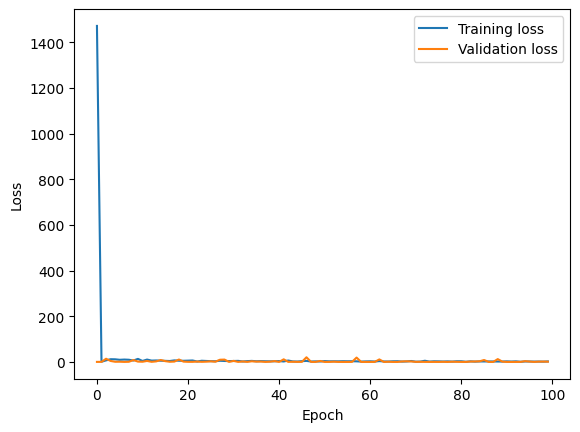

In [4]:
# Define the VAE model
vae = keras.Sequential([
  layers.InputLayer(input_shape=(2,)),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='linear')
])

# Compile the model
vae.compile(optimizer='adam', loss='mse')

# Train the model
vae.fit(x_train, x_train, epochs=100, validation_data=(x_val, x_val))

# Plot the loss curves
import matplotlib.pyplot as plt

plt.plot(vae.history.history['loss'], label='Training loss')
plt.plot(vae.history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [19]:
# Hyperparameter optimization

from keras_tuner import Hyperband

def build_model(hp):
  model = keras.Sequential([
    layers.InputLayer(input_shape=(2,)),
    layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
    layers.Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
def build_model(hp):
  model = tf.keras.Sequential([
      layers.Dense(hp.Choice('units', [16, 32, 64]), activation='relu'),
      layers.Dense(2, activation='linear')
  ])

  model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'adadelta']), loss='mse')
  return model

tuner = Hyperband(build_model, objective='val_loss', max_epochs=100)

tuner.search(x_train, x_train, epochs=100, validation_data=(x_val, x_val))

best_model = tuner.get_best_models()[0]

# Save the best model
best_model.save('vae_best.h5')

## Adam optimizer is proven to be the best optimizer by far

Trial 45 Complete [00h 00m 09s]
val_loss: 0.09286314994096756

Best val_loss So Far: 0.04791498929262161
Total elapsed time: 00h 11m 05s


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 1ms/step


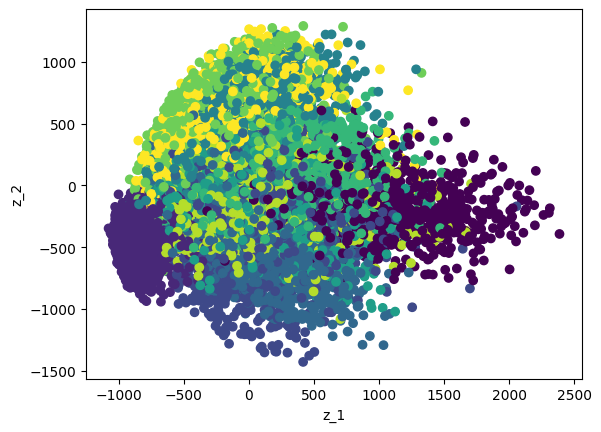

In [27]:
# prompt: Replicate the figure showing the final latent variable space shown below. Note that you will not produce the animated figure shown below but show only the final latent space  (z1,z2) .

# Generate latent variables for the test set

## x_test is the test digits reduced to two components
z_test = vae.predict(x_test)
# Plot the latent variables
plt.scatter(z_test[:, 0], z_test[:, 1], c=y_test)
plt.xlabel('z_1')
plt.ylabel('z_2')
plt.show()


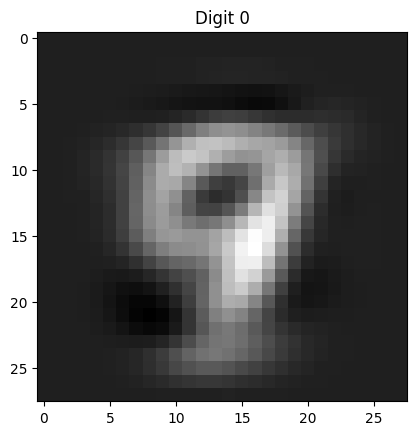

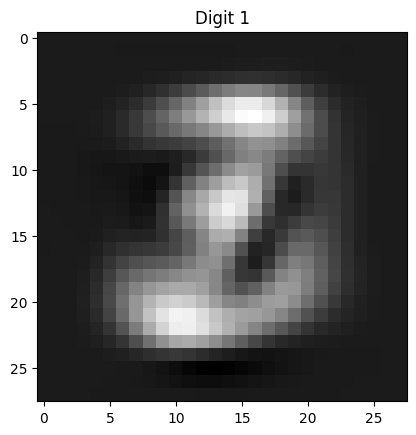

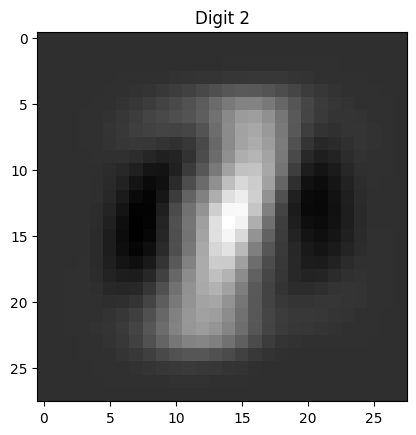

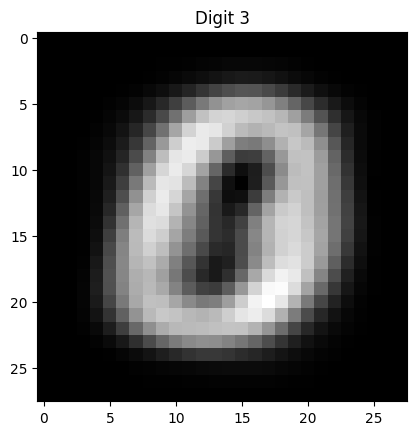

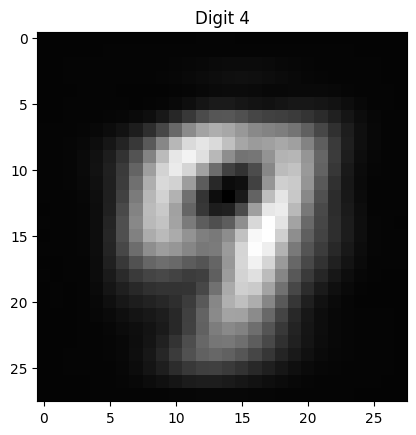

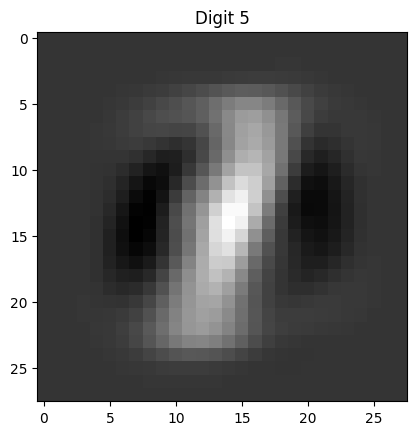

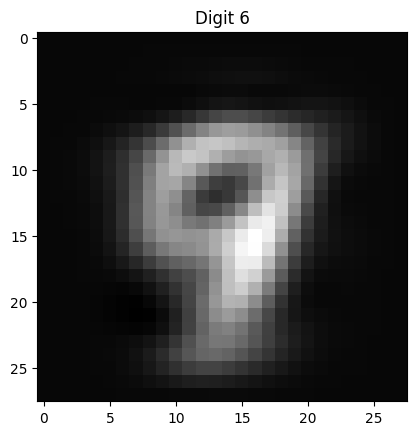

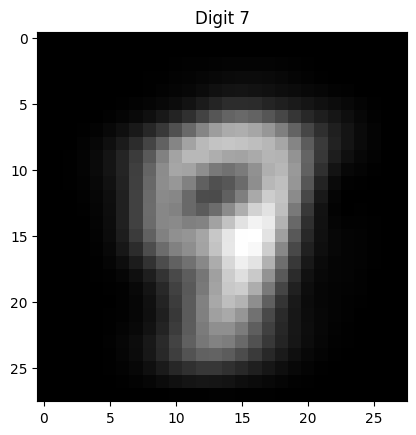

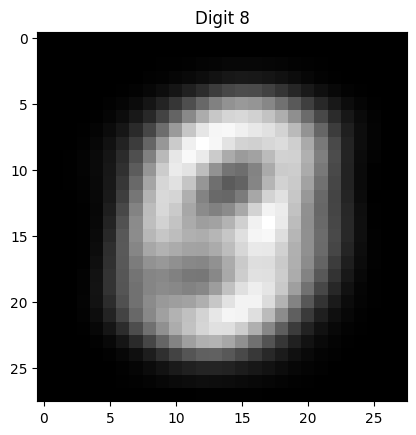

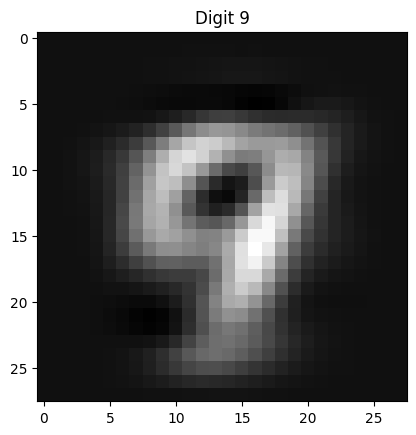

In [6]:

# Decode the latent variables to generate images
#decoded_images = vae.predict(z_test)
x_test_original = pca.inverse_transform(x_test)
# Reshape the decoded images to be compatible with the MNIST dataset
decoded_images = x_test_original.reshape(-1, 28, 28)

# Plot the decoded images
for i in range(10):
  plt.imshow(decoded_images[i], cmap='gray')
  plt.title('Digit {}'.format(i))
  plt.show()


You have two implementation options: (1) All in one notebook (2) Github repo.

### Option 1: All in one Colab notebook

You submit a single Colab notebook URL that contains all the code and the outputs. Your notebook should be self-contained and can be launched in Google Colab using a corresponding button at the top of the notebook. See the regression notebook in the course site for an example of such button. You **need to save all outputs in the notebook** so that the TAs can check that your code is working properly.

### Option 2: Github repo

If you prefer to work without notebooks, with containers or not, you can submit the implementation python scripts and version control your code in a private Github repo. You have to submit the Github URL and clearly document the way to launch the runtime / install requirements.txt and include all required figures in the README.md file.

IMPORTANT: Ensure that the github repo remains private. If you submit a public github repo you will be held responsible for violating the honor code.